![alt_text](https://www.hopkinsmedicine.org/-/media/images/health/2_-treatment/neurology/emg-hero.ashx?h=500&la=en&mh=500&mw=1300&w=1297&hash=11DEAF5D238A6F39A571CBD99A4307C2100D74FB 'Person having an EMG test done on their hand')

# Welcome to the Analyze EMG notebook!
#### By the end of this notebook, you will be able to...

_1. Understand what an EMG is._

_2. Recognize the five parts of an ECG and why they occur._

_3. Examine your own muscle data!_

---

Instructions: To run a code block, click on it to __select__ it, and then press __SHIFT__ and __ENTER__ or click the __PLAY__ arrow in the top left corner of the block. Note that you do __not__ need to understand Python to use this notebook--just run each code cell and observe the plots that follow it.

To begin the notebook, press the "Reset file name" button. This lesson comes with two EMG example files: __EMG_Example1__ and __EMG_Example2__. Select the file you would like to use, then run each code block that follows.

---

## So, what is an EMG and why should we be learning about it?

EMG stands for __electromyogram__, which is a test that records the electrical activity that moves through the muscles. As the muscles contract, or activate, the motor neurons controlling the muscle fire. This firing of the motor neurons is visible in the EMG data, as shown in the figure below.

![alt_text](https://cdn.hackaday.io/images/4041431523546096661.png "Labeled EMG Wave")

---

## That's cool, but what do these peaks in the EMG wave mean? 

Each of the peaks in the wave shown above represents an action potential of a motor neuron. The short video below will explain more about EMG:

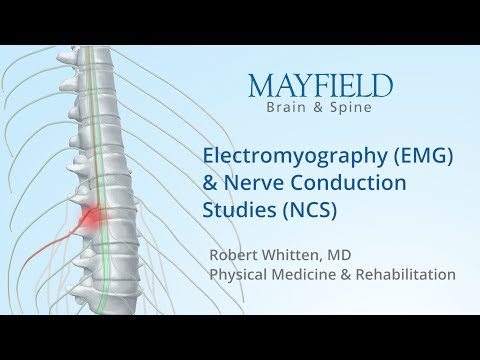

In [1]:
from IPython.display import YouTubeVideo
# a short video about interpreting ECG
# Video credit: Mayfield Brain and Spine.
YouTubeVideo('4kkIvP1jNLA')

---

## Why are EMG tests important? What's the point?

An EEG test is capable of detecting abnormalities in heart rhythm. These abnormalities may indicate diseases or disorders such as __neuropathy__, __myopathy__, or __ALS__. These diseases and disorders may be identified by specific abnormalities in the EMG waves. For example, the image below shows a normal EMG signal compared with a signal indicating __neuropathy__ and a signal indicating __myopathy__.
![alt_text](https://www.intechopen.com/media/chapter/44811/media/image3.jpeg 'EMG Abnormalities')

---

## Awesome, when can I look at some EMG waves?

Right now! Below you will see a prompt that will ask you to select a file to open. Select the either __EMG_Example1.csv__ or __EMG_Example2.csv__.

After you select your file, a plot will appear when you run the final block of code below. The plot has __four__ sliders:  
&emsp;&emsp;(1) x position (2) zoom horizontal (3) y position (4) zoom vertical
    
The plot will automatically update as you move any of the sliders.  

If you wish to __start over__ with a new EMG file, simply re-run the first code block.

#### Good luck and enjoy the _waves_!

---

In [5]:
# Let's begin by uploading a file with EMG data
import os
import warnings
from google.colab import files
import io
warnings.filterwarnings('ignore')
uploaded = files.upload()
import pandas as pd
import numpy as np
for fn in uploaded.keys():
  print("Successfully uploaded file {name}".format(name=fn))
  emg_data = pd.read_csv(io.BytesIO(uploaded[fn]))
  # Uncomment the line below to print a preview of the data
  # print(emg_data)

Saving EMG_Example2.csv to EMG_Example2.csv
Successfully uploaded file EMG_Example2.csv


In [0]:
# Let's define our sampling rate and number of samples in our data
Fs = 125 # sampling rate
N = emg_data.shape[0] # Total number of time samples
T = emg_data.index.values/Fs # Time samples (second)

---

## Plot the raw EMG signal

In the example EMG files, there is electrical activity data collected from person's heart. We will now plot this data and see if we can recognize the different parts of the wave!

In [4]:
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

[xmin,xmax,ymin,ymax] = [T[0],T[-1],emg_data.min().min(),emg_data.max().max()]
[W,H] = [xmax-xmin,ymax-ymin]
def plot_emg(px,py,pw,ph):
    xx = np.array([px-1/pw/2,px+1/pw/2])
    yy = np.array([py-1/ph/2,py+1/ph/2])
    [x1,x2] = [max(np.floor(xx[0]*N).astype(int),0) , min(np.ceil(xx[1]*N).astype(int),N)]
    
    plt.figure(figsize=(12,5))
    plt.plot(T[x1:x2],emg_data[x1:x2])
    plt.scatter(T[x1:x2],emg_data[x1:x2])
    plt.xlim(xmin+W*xx)
    plt.ylim(ymin+H*yy)
    plt.grid()
    plt.ylabel('Voltage')
    plt.title('EMG')
    plt.show()

w_px = widgets.FloatSlider(value=0.5,min=0,max=1,step=0.01,readout=False,orientation='horizontal')
w_py = widgets.FloatSlider(value=0.5,min=0,max=2,step=0.01,description='Y position',readout=False,orientation='vertical')
w_pw = widgets.FloatSlider(value=1,min=0,max=T[-1],step=0.02,readout=False,orientation='horizontal')
w_ph = widgets.FloatSlider(value=1,min=0,max=2,step=0.02,description='Zoom vertical',readout=False,orientation='vertical')
w_update = widgets.ToggleButton(value=True,description='Continuous update',button_style='info',icon='times')

def cont_update(*args):
    if w_update.value:
        w_update.icon = 'times'
        w_px.continuous_update = True; w_py.continuous_update = True
        w_pw.continuous_update = True; w_ph.continuous_update = True
    else:
        w_update.icon = 'repeat'
        w_px.continuous_update = False; w_py.continuous_update = False
        w_pw.continuous_update = False; w_ph.continuous_update = False
w_update.observe(cont_update,'value')

between = Layout(justify_content='space-between')
ui = HBox([HBox([w_update,VBox([Label('X position'),Label('Zoom horizontal')]),VBox([w_px,w_pw]) ],layout=between), w_py,w_ph ])
out = interactive_output(plot_emg,{'px':w_px,'py':w_py,'pw':w_pw,'ph':w_ph})
display(ui,out)

Output()

## Congratulations! You've completed the notebook, and should have a better understanding of ECG data.